<a href="https://colab.research.google.com/github/amitmeel/Tensorflow-2.0-Deep-Learning-and-Artificial-Intelligence/blob/main/3_Reggresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [5]:
from google.colab import files
uploaded = files.upload()

## or using wget
## !wget https://github.com/lazyprogrammer/machine_learning_examples/blob/master/tf2.0/moore.csv

Saving moore.csv to moore.csv


In [6]:
data = pd.read_csv('moore.csv', header=None)

In [17]:
X = data.loc[:,0].values
X = X.reshape(-1,1)

In [18]:
y = data.loc[:, 1].values

In [19]:
X.shape, y.shape

((162, 1), (162,))

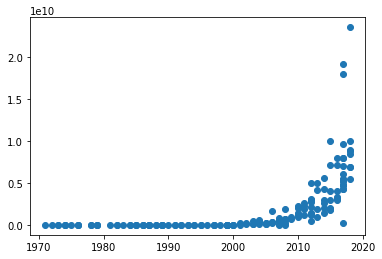

In [20]:
plt.scatter(X,y)

In [21]:
import numpy as np
y = np.log(y)

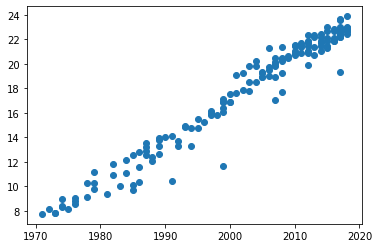

In [22]:
plt.scatter(X,y)

In [23]:
X = X - X.mean()

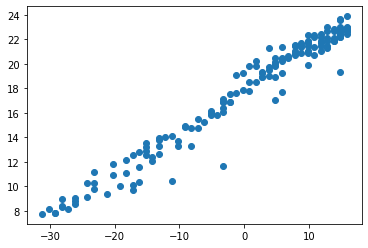

In [24]:
plt.scatter(X,y)

In [26]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9), loss='mse')


def schedule(epoch, lr):
  if epoch > 50:
     return 0.0001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule, verbose=0)

history = model.fit(X,y, epochs=200, callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 1s 3ms/step - loss: 415.4577 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 3ms/step - loss: 415.6899 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 3ms/step - loss: 318.9534 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 3ms/step - loss: 228.4341 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 3ms/step - loss: 241.7671 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 3ms/step - loss: 204.2258 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 3ms/step - loss: 135.6497 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 3ms/step - loss: 102.3472 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 4ms/step - loss: 115.2790 - lr: 0.0010
Epoch 10/200
6/6 [==============================] - 0s 3ms/step - loss: 75.7606 - lr: 0.0010
Epoch 11/200
6/6 [==============================] - 0s 4ms/step - loss

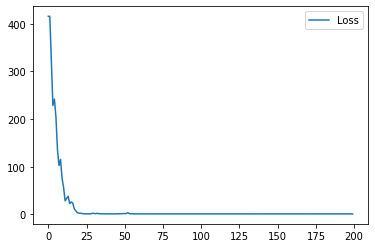

In [27]:
# loss curve
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Loss')
plt.legend()

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.layers

In [36]:
model.layers[0].get_weights()

[array([[0.34052786]], dtype=float32), array([17.772388], dtype=float32)]

In [37]:
### make predictions

In [39]:
y_pred = model.predict(X).flatten()

6/6 [==============================] - 0s 3ms/step


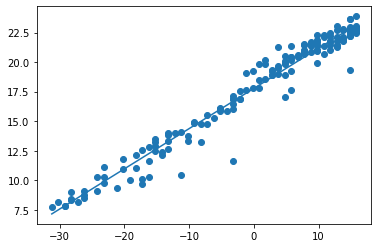

In [40]:
plt.scatter(X,y)
plt.plot(X, y_pred)

In [41]:
## manual calculation

w,b  = model.layers[0].get_weights()
X = X.reshape(-1,1)
y_pred2 = (np.dot(X,w) + b).flatten()

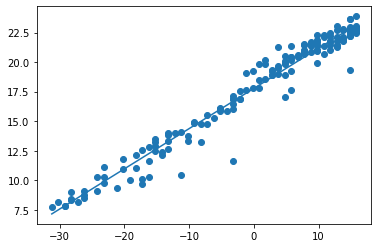

In [42]:
plt.scatter(X,y)
plt.plot(X, y_pred2)

In [44]:
np.allclose(y_pred, y_pred2)  # checking manually adn auto calculated prediction are same or not

True

In [ ]:
#There are two formats you can use to save an entire model to disk: the TensorFlow SavedModel format,
# and the older Keras H5 format. The recommended format is SavedModel. It is the default when you use model.save().

model.save('path/to/location')  #model.save() or tf.keras.models.save_model()
model = tf.keras.models.load_model('path/to/location')